In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [300]:
path_13 = 'data/battery_13_500.csv'
df_13 = pd.read_csv(path_13)

In [301]:
# Voy a necesitar solamente los registros de temperatura
df_temp = df_13.copy()
df_temp['obs'] = range(1, len(df_temp)+1)

## Serie de Tiempo para Temperature

In [302]:
df_temp = df_temp[['obs','time', 'temperature_battery']]
df_temp.head()

,obs,time,temperature_battery
0,1,1746819.055,22.668
1,2,1746820.073,22.668
2,3,1746821.115,22.668
3,4,1746822.133,22.668
4,5,1746823.150,22.664


In [303]:
df_temp.shape

(500, 3)

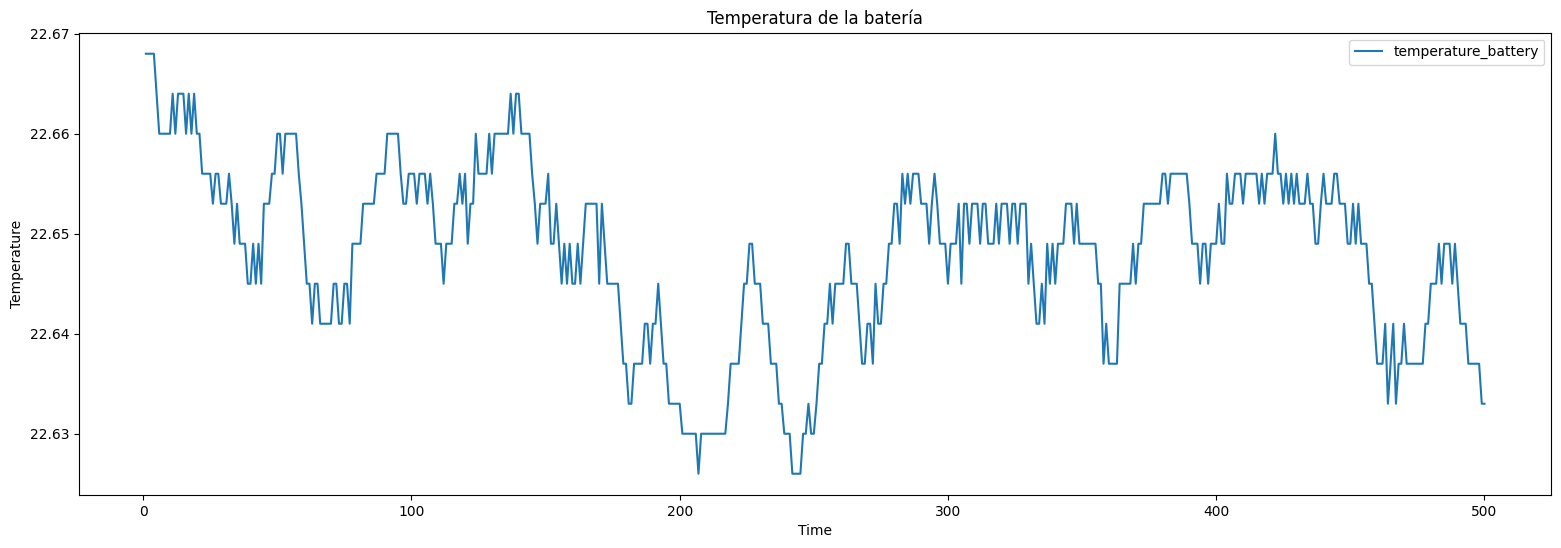

In [304]:
df_temp.plot(
    x = 'obs',
    y = 'temperature_battery',
    figsize=(19, 6)
)
plt.title("Temperatura de la batería")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.show()

In [305]:
df_temp.describe()
# Vamos a usar estos datos como referencia para la corrección de valore nulos

,obs,time,temperature_battery
count,500.000000,5.000000e+02,500.000000
mean,250.500000,1.747074e+06,22.648154
std,144.481833,1.477761e+02,0.008685
min,1.000000,1.746819e+06,22.626000
25%,125.750000,1.746946e+06,22.641000
50%,250.500000,1.747074e+06,22.649000
75%,375.250000,1.747201e+06,22.653000
max,500.000000,1.747330e+06,22.668000


# Instrucciónes
Con base en el material entregado en la tarea 2 y lo visto en clase:

1.- Obtener una serie de tiempo generada a partir de algún fenómeno real, que tenga una longitud de al menos 300 muestras; de ser posible seleccionar una serie que presente valores perdidos o outliers.

2.- Introducir arbitrariamente entre 3 y 5 outliers, de los cuales al menos 2 sean valores extremos (muy alejados de la media) y al menos 2 sean valores convencionales pero con comportamiento atípico.

3.- Introducir arbitrariamente de 3 a 5 valores perdidos aislados (no consecutivos), así como 2 segmentos de valores perdidos sucesivos de longitudes de entre 3 y 5 muestras.

4.- Aplicar las técnicas de detección y tratamiento de outliers y de valores perdidos mencionados en la tarea 2.

5.- Mostrar el efecto de las diferentes transformaciones y graficar cada paso.

Analizar los resultados y reportar dicho análisis.

## 2 - Introducir Outliers

5 outliers:

    - 2 valores extremos (muy alejados de la media)
    - 2 convencionales con conportamiento atípico

In [306]:
df_temp.head(10)

,obs,time,temperature_battery
0,1,1746819.055,22.668
1,2,1746820.073,22.668
2,3,1746821.115,22.668
3,4,1746822.133,22.668
4,5,1746823.150,22.664
5,6,1746824.174,22.660
6,7,1746825.191,22.660
7,8,1746826.215,22.660
8,9,1746827.233,22.660
9,10,1746828.253,22.660


In [307]:
# 2 valores muy extremos, uno en el tiempo 5 y otro en el 100
df_temp.loc[df_temp['obs'] == 5, 'temperature_battery'] = 22.61      # Extremo
df_temp.loc[df_temp['obs'] == 100, 'temperature_battery'] = 22.62    # Extremo
df_temp.loc[df_temp['obs'] == 300, 'temperature_battery'] = 22.661   # Atípico
df_temp.loc[df_temp['obs'] == 400, 'temperature_battery'] = 22.661   # Atípico

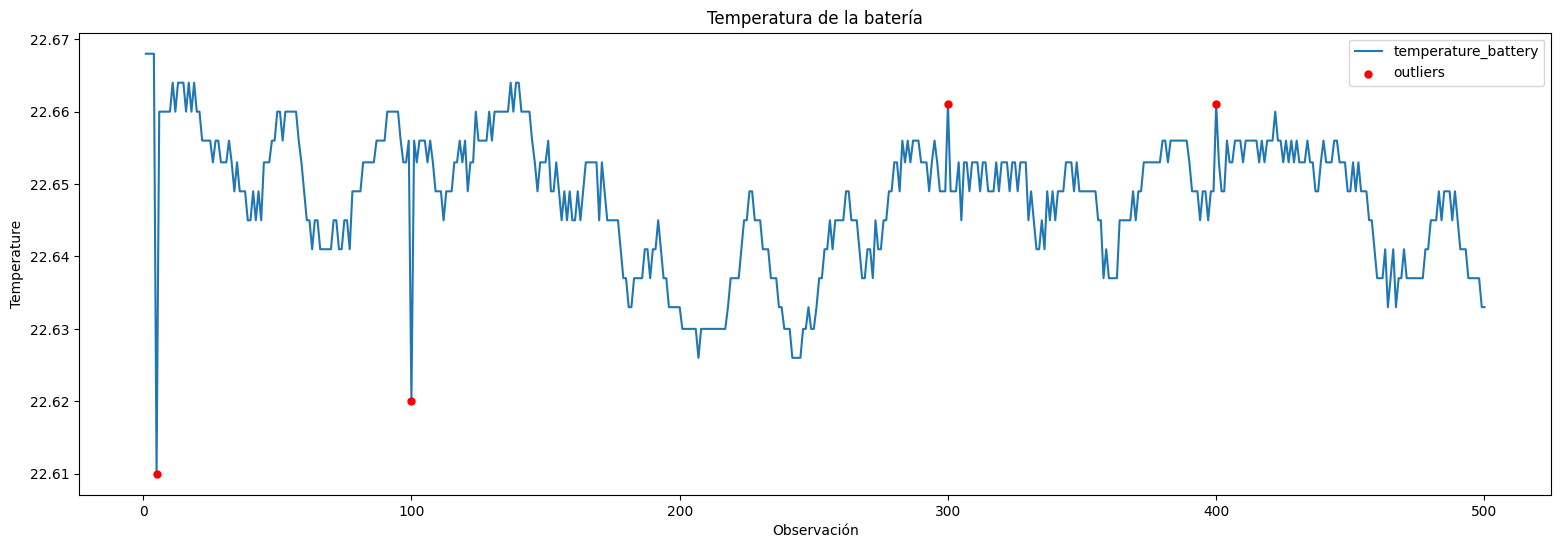

In [308]:
# Serie
ax = df_temp.plot(
    x = 'obs',
    y = 'temperature_battery',
    figsize=(19,6))

# Outliers
outliers = [5, 100, 300, 400]
ax.scatter(
    df_temp.loc[df_temp['obs'].isin(outliers), 'obs'],
    df_temp.loc[df_temp['obs'].isin(outliers), 'temperature_battery'],
    color='red',       
    s=25,            
    zorder=5,         
    label='outliers')

plt.title("Temperatura de la batería")
plt.xlabel("Observación")
plt.ylabel("Temperature")
ax.legend()
plt.show()

## 3 - Valores perdidos

    -   3 valores perdidos aislados no consecutivos
    -   2 segmentos de 5 muestras de valores perdidos

In [309]:
# Vamos a poner los perdidos individuales en 50, 150 y 250
df_temp.loc[df_temp['obs'] == 50, 'temperature_battery'] = np.nan
df_temp.loc[df_temp['obs'] == 150, 'temperature_battery'] = np.nan
df_temp.loc[df_temp['obs'] == 250, 'temperature_battery'] = np.nan

# Vamos a poner las muestras con 5 valores perdidos en 75, 175 y 275
lista = [75, 175, 275]
for valor in lista:
    df_temp.iloc[df_temp.index[valor:valor+5], df_temp.columns.get_loc('temperature_battery')] = np.nan

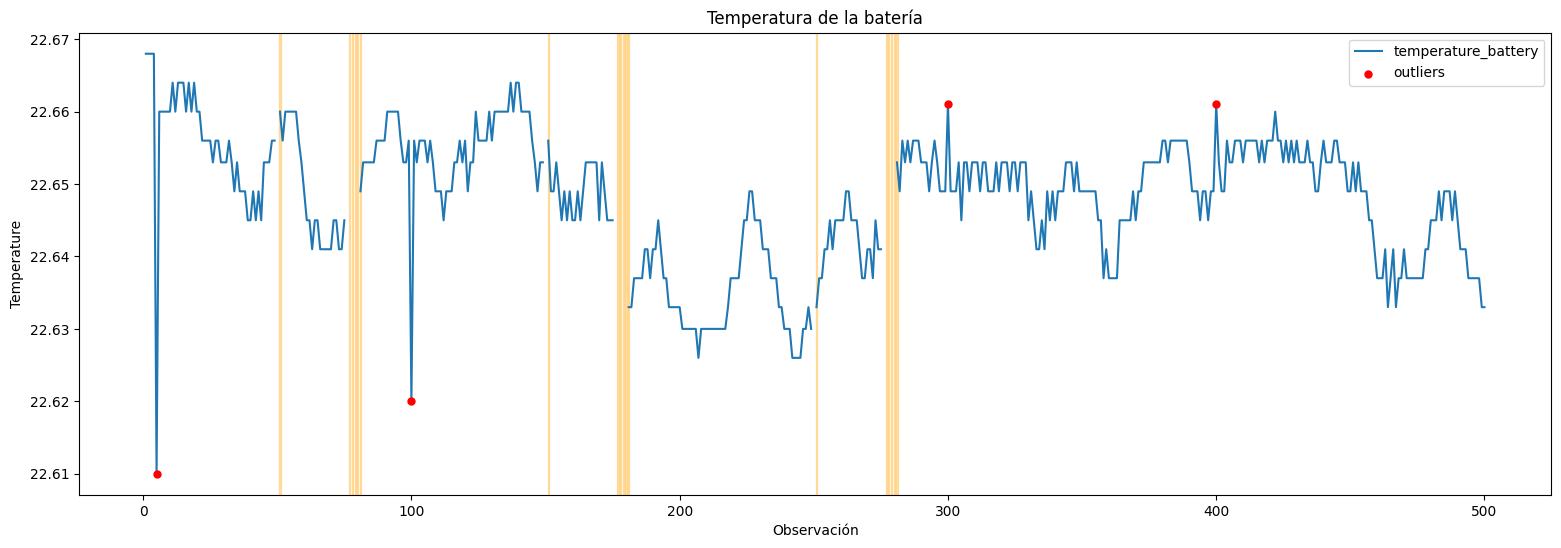

In [310]:
# Serie
ax = df_temp.plot(
    x = 'obs',
    y = 'temperature_battery',
    figsize=(19,6))

# Outliers
outliers = [5, 100, 300, 400]
ax.scatter(
    df_temp.loc[df_temp['obs'].isin(outliers), 'obs'],
    df_temp.loc[df_temp['obs'].isin(outliers), 'temperature_battery'],
    color='red',       
    s=25,            
    zorder=5,         
    label='outliers')

# Perdidos
perdidos = df_temp[df_temp['temperature_battery'].isna()]['obs']
for idx in perdidos:
    ax.axvspan(df_temp.loc[idx, 'obs']-0.2, df_temp.loc[idx, 'obs']+0.2, 
               color='orange', alpha=0.3)

plt.title("Temperatura de la batería")
plt.xlabel("Observación")
plt.ylabel("Temperature")
ax.legend()
plt.show()


## 4 - Detección y tratamiento de outliers y de valores perdidos
    -   Primero se hace imputación de valores nulos
    -   Después se va a aplicar un isolation forest


In [311]:
# Imputación de valores nulos con la media
df_temp['temperature_battery'].describe()

count    482.000000
mean      22.648118
std        0.009001
min       22.610000
25%       22.641000
50%       22.649000
75%       22.653000
max       22.668000
Name: temperature_battery, dtype: float64

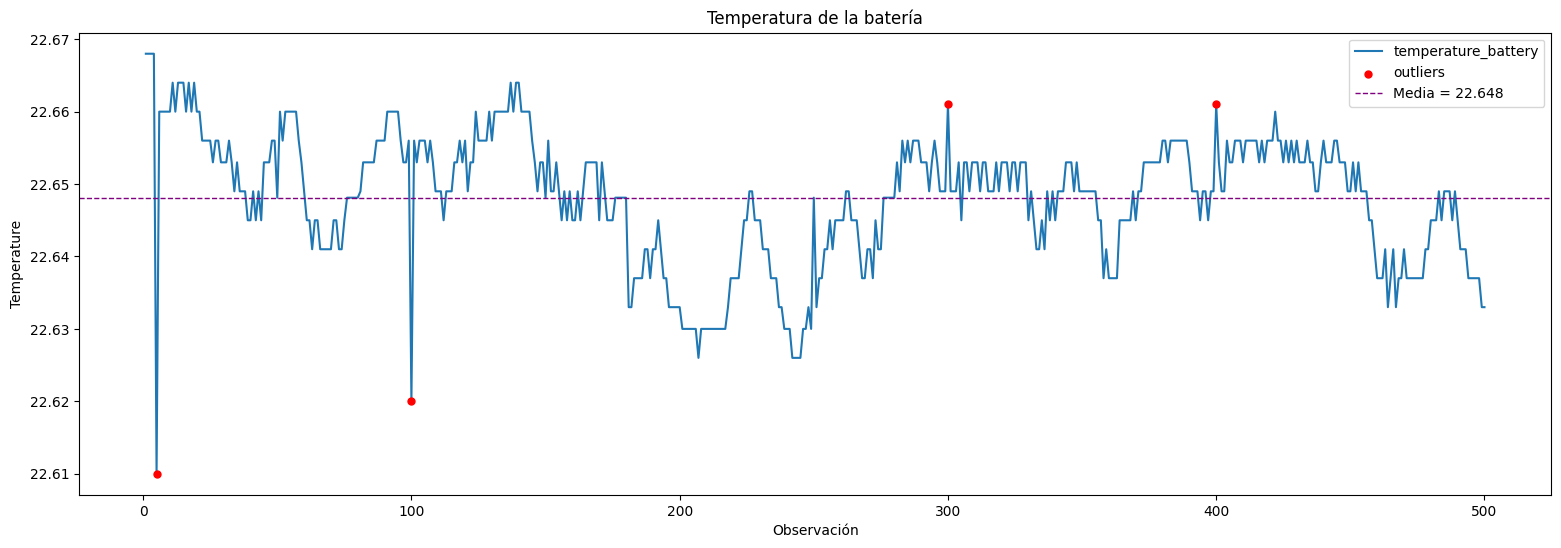

In [313]:
media =  22.648118
df_temp['temperature_battery'] = df_temp['temperature_battery'].fillna(media)

# Serie
ax = df_temp.plot(
    x = 'obs',
    y = 'temperature_battery',
    figsize=(19,6))

# Outliers
outliers = [5, 100, 300, 400]
ax.scatter(
    df_temp.loc[df_temp['obs'].isin(outliers), 'obs'],
    df_temp.loc[df_temp['obs'].isin(outliers), 'temperature_battery'],
    color='red',       
    s=25,            
    zorder=5,         
    label='outliers')

# Media

ax.axhline(y = media,
         color='purple',
         linestyle = '--',
         linewidth = 1,
         label = f'Media = {media:.3f}')

plt.title("Temperatura de la batería")
plt.xlabel("Observación")
plt.ylabel("Temperature")
ax.legend()
plt.show()